In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio
from rasterio import features
from glob import glob
from tqdm import tqdm
from PIL import Image

In [2]:
state = "or"
sat_files = np.sort(glob("sentinel2/{}/composite/*.tif".format(state)))
lte_files = np.sort(glob("fcc477actual/sentinel2/{}/cat10*.jpg".format(state)))
cell_files = np.sort(glob("celltowers/sentinel2/{}/*.jpg".format(state)))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


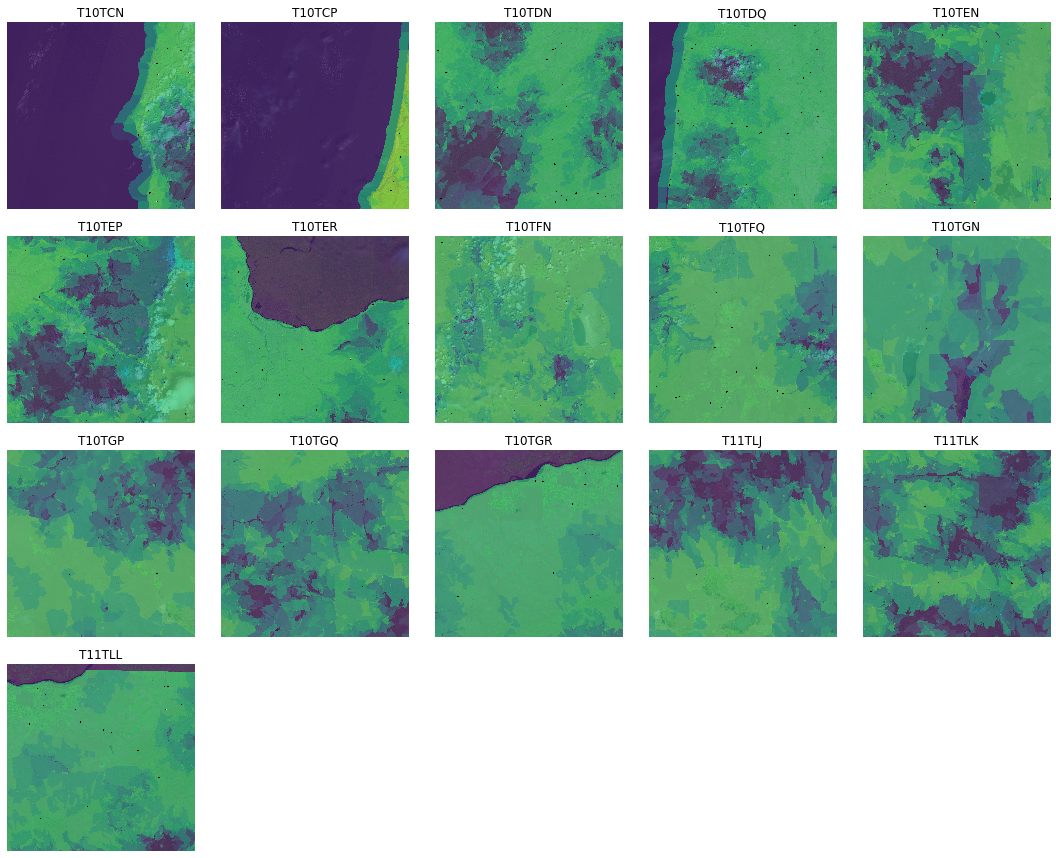

In [6]:
%pylab
%matplotlib inline
figure(figsize=(15,15))
for i, (sat, lte, cell) in enumerate(zip(sat_files, lte_files, cell_files)):
    subplot(5,5,i+1)
    title(sat.split("\\")[-1].split(".")[0])
    imshow(rio.open(sat.replace("\\","/")).read().transpose([1,2,0]))
    imshow(rio.open(lte.replace("\\","/")).read()[0,:,:],alpha=0.7,cmap="viridis")
    cell_array = rio.open(cell.replace("\\","/")).read()[0,:,:]
    imshow(np.ma.masked_where(cell_array <1, cell_array),cmap="magma")
    axis("off")
tight_layout()
    